#TP : Etude du contenu de Netflix

# 1) Qu'est-ce que Netflix ? 

Netflix est un service de streaming sur abonnement qui permet aux utilisateurs de regarder des séries TV et des films sans publicité sur un appareil connecté à Internet.
Une des particularité de Netflix est que son contenu varie en fonction de la position géographique de l'utilisateur 🌍 

In [2]:
# on importe le dataset que l'on étudie, ainsi que les librairies dont nous avons besoin 

#Les librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Le dataset
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/M1 Tech lead/Algorithmie/dataset/'
#Le sep = "" correspond aux séparations utilisées dans le fichier. Ici il s'agit des ,
netflix = pd.read_csv(root_path+'netflix_titles.csv', sep = ",")
print('Fichier uploader ! ✨')

#On regarde que le fichier s'est upload correctement
netflix.head(5)

Mounted at /content/gdrive
Fichier uploader ! ✨


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


#2) Contenu du dataset

In [ ]:
#On regarde la composition de notre dataset 
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Le dataset contient les informations suivantes : 


* L'**id** de l'objet
* Le **type** : s'il s'agit d'un films ou d'une série
* Le **titre** du films ou de la série
* Le **directeur** qui produit l'oeuvre
* Le **cast** correspond au casting du film/de la série
* **country** correspond aux pays où le film est publié
* **date_added** correspond à la date à laquelle le film a été ajouté sur Netflix. Attention, elle n'est pas en *datetime*
* **release_year** est la date de sortie du film ! Il ne faut pas confondre avec la date d'ajout sur Netflix
* **rating** est la note du film/de la série donnée par les utilisateurs
* La durée du film/ Le nombre de saison de la série : **duration**
* Les catégories qui correspondent au film/à la série : **listed_in**
* La **description** du film/de la série



#3) Etude de la répartition de contenu de Netflix

Regardons ce que nous trouvons sur Netflix 

<Figure size 1080x576 with 0 Axes>

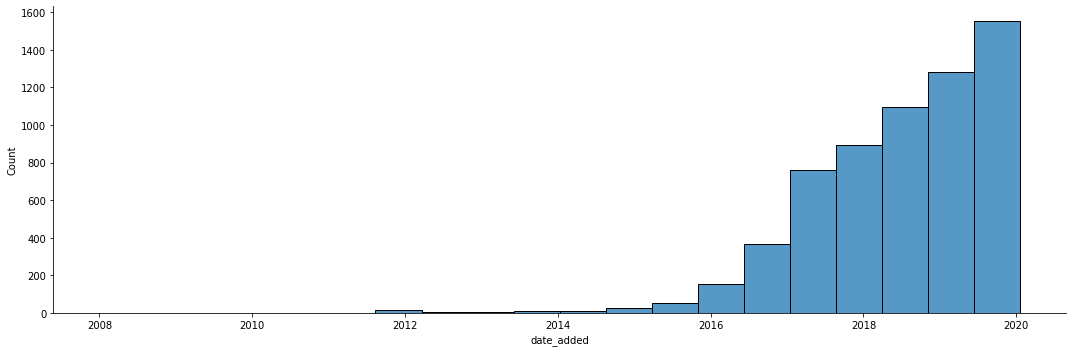

In [5]:
#Transformation de la date au format Datetime
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

#On affiche le nombre de films posté en fonction de la date 
plt.figure(figsize=(15,8))
sns.displot(netflix.date_added, bins=20, kde=False, aspect= 3)

On remarque au fil des années que Netflix rajoute de plus en plus de contenu (surtout en 2019 - 2020). en effet la situation sanitaire donne un avantage à Netflix car les personne restent chez eux, ainsi ils ont plus l'occasion de regarder la télévision ou bien leurs ordinateurs / téléphones donc ils peuvent regarder Netflix plus facilement qu'avant.

## a) Plus de films ou bien plus de séries ?

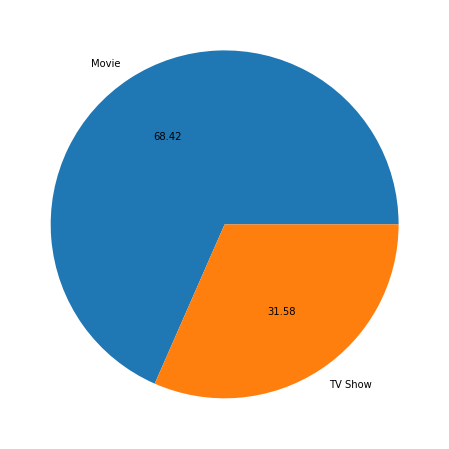

In [8]:
#netflix.type.value_counts().plot(kind='pie');
#On créer un tableau pour les labels de notre graphique
NetflixType = netflix.type.unique()

#On affiche notre graphique avec les % de chaque parties
plt.figure(figsize=(12,8))
plt.pie(netflix.type.value_counts(), 
        labels=NetflixType,
        autopct = "%.2f"
        );

On remarque qu'il y a beacoup plus de films que de séries sur la plateforme (ce qui est très étonnant car ce n'est pas l'impression que cela donne).

Comment expliquer ce résultat ? 


*   On rappelle que selon où l'on se trouve, le contenu de la plateforme change, ce qui n'est pas pris en compte dans ce dataset. Il est dont tout à fait probable que dans certains pays il y a effectivement plus de films alors que dans d'autres régions il y aurait plus de séries 🌍
*   Une série contient plusieurs saisons, la durée est donc plus élever qu'un film, donc on a l'impression qu'il y a plus de contenu séries que de films.



## b) Dates ciblées ?

Nous allons à present étudié le calendried de publication de Netflix voir s'il présente des particularités. 
Afin d'avoir une année entière et 2020 n'étant pas fini, on se concentrera sur 2019

<Figure size 1080x576 with 0 Axes>

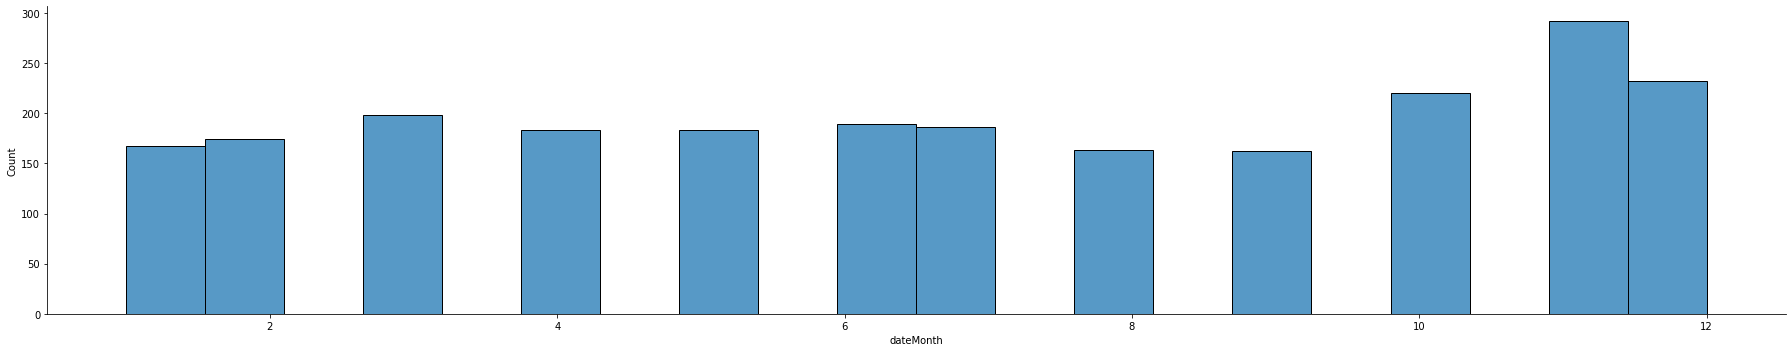

In [6]:
netflix['dateYear'] = netflix['date_added'].dt.year
netflix['dateMonth'] = netflix['date_added'].dt.month

#On affiche donc le nombre de films/série ajouté tout au long de l'année 2019
Netflix2019 = netflix[netflix['dateYear'] == 2019]
plt.figure(figsize=(15,8))
sns.displot(Netflix2019.dateMonth,
            bins= 20,
            kde = False,
            aspect=5)

Avec ce graphique on peut remarquer qu'au alentour des période de Noël, l'ajout de contenu est plus important que les autres mois qui présente un aspect un peu plus régulier. 


#4) Nettoyage des données

Vérifions si nos données présente des NaN.

In [ ]:
netflix.isna().sum()


show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dateYear          11
dateMonth         11
dtype: int64

In [ ]:
netflix.show_id.count()

6234

Le dataset comprends 6234 films et série confondus. Donc les informations concenant les données **cast**, **country**, **date_added** et **rating**, ne représente pas énormément de données par rapport au nombre d'entrées totales.

En ce qui concerne la case **director**, cela est plus compliqué car on ne peux pas "deviner" qui a produit le film. Il est donc très compliqué de remplir ses information et les supprimer impacterais le dataset. 

De plus l'étude ne portant pas spécialement sur les directeurs des films, dans ce cas là ce n'est pas handicapant de laissé ses informations vides.

#5) Le type de contenu en fonction de la date de publication

Avec le graphique représentant les publication par mois, on remarque que les publications sont plus élevés vers la fin de l'année, notamment octobre, novembre et décembre.

On va donc étudier le type de contenu de ses mois.

##a) Le mois d'Octobre

([<matplotlib.patches.Wedge at 0x7f0f9d651208>,
 [Text(-0.3990884968250827, 1.0250504239801554, 'Movie'),
  Text(0.3990884968250828, -1.0250504239801552, 'TV Show')],
 [Text(-0.21768463463186324, 0.5591184130800847, '61.82'),
  Text(0.21768463463186333, -0.5591184130800846, '38.18')])

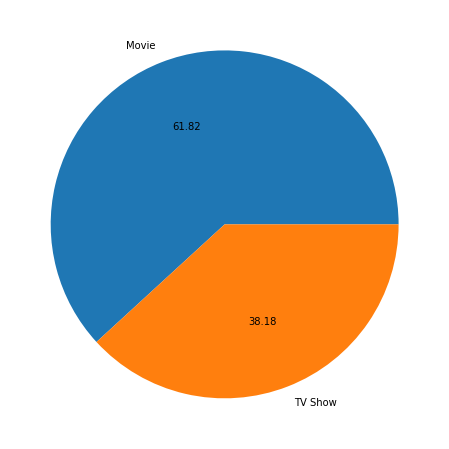

In [ ]:
#on filtre le contenu d'Octobre 2019
Octobre19 = Netflix2019[Netflix2019['dateMonth'] == 10]

#On affiche le type de contenu (Film ou série ?)
plt.figure(figsize =(12,8))
plt.pie(Octobre19.type.value_counts(),
        labels=NetflixType,
        autopct = "%.2f")

In [ ]:
#Les films étant majoritaire, on va s'intéresser à ceux_ci
Octobre19Film = Octobre19[Octobre19['type'] == "Movie"]
Octobre19Film['listed_in'].unique()

array(['Dramas, Romantic Movies', 'Dramas, Thrillers', 'Stand-Up Comedy',
       'Children & Family Movies, Comedies',
       'Dramas, International Movies',
       'Dramas, International Movies, Romantic Movies',
       'Dramas, Independent Movies, International Movies',
       'Documentaries', 'Comedies, International Movies, Romantic Movies',
       'Horror Movies, Thrillers', 'Children & Family Movies',
       'Documentaries, International Movies',
       'Documentaries, International Movies, Sports Movies',
       'Dramas, Sports Movies',
       'Horror Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers', 'Comedies, Dramas',
       'International Movies',
       'Horror Movies, Independent Movies, Thrillers',
       'Comedies, Dramas, International Movies',
       'Documentaries, Music & Musicals',
       'Horror Movies, International Movies',
       'Action & Adventure, Dramas',
       'Action & Adventure, International Movies',
       'Action &

On remarque que beaucoup de films sont des *Thrillers* ou bien des film *d'Horreur* ce qui correspond à la période d'Halloween. Halloween est aujourd'hui célébrée principalement en Irlande, en Grande-Bretagne, aux États-Unis, au Canada, en Australie, en Nouvelle-Zélande et, dans une moindre mesure, dans de nombreux autres pays. 

Ainsi on peut émettre l'hypothèse que Netflix adapte ses contenus par rapport aux événements.

##b) Le mois de novembre

([<matplotlib.patches.Wedge at 0x7f0f9d634080>,
 [Text(-0.6522949939709985, 0.8857263916359133, 'Movie'),
  Text(0.6522949939709989, -0.885726391635913, 'TV Show')],
 [Text(-0.3557972694387264, 0.48312348634686175, '70.21'),
  Text(0.35579726943872664, -0.4831234863468616, '29.79')])

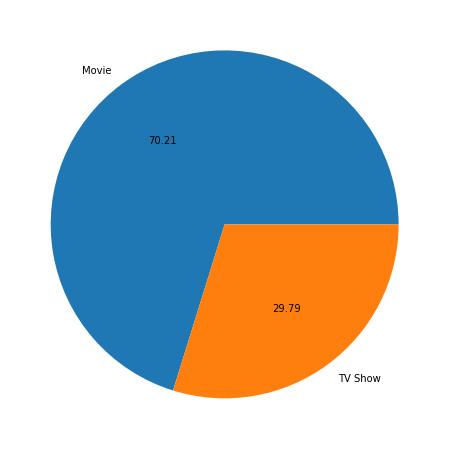

In [ ]:
#On commence par filtrer le contenu du mois de novembre
Novembre19 = Netflix2019[Netflix2019['dateMonth'] == 11]

#On affiche le type de contenu (Film ou série ?)
plt.figure(figsize =(12,8))
plt.pie(Novembre19.type.value_counts(),
        labels=NetflixType,
        autopct = "%.2f")

On remarque qu'il y a encore une grande majorité de films. Afin de vérifier notre hypothèse, nous allons étudiez les catégories des films.

In [ ]:
Novembre19Film = Novembre19[Novembre19['type'] == "Movie"]
Novembre19Film['listed_in'].unique()

array(['Action & Adventure, Comedies, Romantic Movies',
       'Comedies, Dramas, LGBTQ Movies',
       'Action & Adventure, Dramas, International Movies',
       'International Movies, Thrillers', 'Dramas',
       'Children & Family Movies, Comedies', 'Stand-Up Comedy',
       'Comedies, Dramas, Independent Movies',
       'Dramas, International Movies, Romantic Movies', 'Comedies',
       'Children & Family Movies, Comedies, Romantic Movies',
       'Comedies, Romantic Movies',
       'Action & Adventure, International Movies, Sci-Fi & Fantasy',
       'Comedies, Independent Movies, Romantic Movies', 'Documentaries',
       'Dramas, International Movies, Thrillers',
       'Documentaries, International Movies',
       'Comedies, Dramas, International Movies', 'Action & Adventure',
       'Dramas, Independent Movies, International Movies',
       'Comedies, International Movies, Thrillers',
       'Dramas, International Movies', 'Comedies, International Movies',
       'Comedies, Inde

On peut voir qu'on a beaucoup plus de films *romantique* ce qui s'accorde bien avec les fameux **Films de Noël**.

On peut donc confirmer qu'effectivement Netflix poste leur contenus en fonction de la période dans laquelle on se trouve. On trouvera plus de film d'Horreur sur la période d'Halloween et plus de films romantiques à la période de Noël.

##c) Par curiosité

Maintenant que l'on sait ce que Netflix va poster son contenu en fonction de la période on peut se demander ce qu'il poste hors de ces périodes particulières. Par exemple que trouve-t-on comme contenu en Juillet

([<matplotlib.patches.Wedge at 0x7f15855374a8>,
 [Text(-0.2757177275932748, 1.0648848457419238, 'Movie'),
  Text(0.27571762789155874, -1.0648848715564758, 'TV Show')],
 [Text(-0.15039148777814987, 0.5808462794955948, '58.06'),
  Text(0.15039143339539565, -0.5808462935762595, '41.94')])

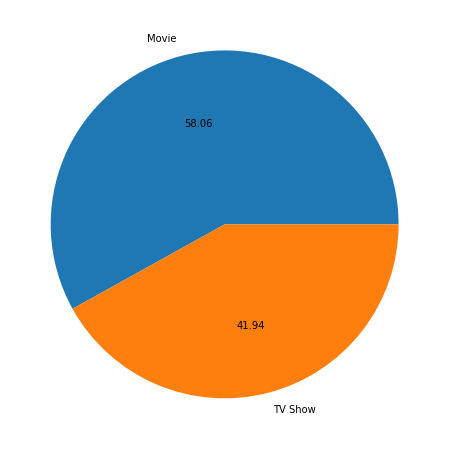

In [9]:
#On filtre pour le contenu pour juillet
Ete19 = Netflix2019[(Netflix2019['dateMonth'] == 7)]
#Ete19.head()

#On affiche le type de contenu
plt.figure(figsize =(12,8))
plt.pie(Ete19.type.value_counts(),labels=NetflixType,autopct = "%.2f")

Pour une fois, on remarque que la quantité série/films est pas loin d'être équivalente. 

Jettons un oeil à ce qu'il se trouve dans les séries.

In [11]:
#On filtre les séries de juillet 2019
seriesEte19 = Ete19[Ete19['type'] == "TV Show"]

seriesEte19['listed_in'].unique()

array(["Kids' TV", 'Crime TV Shows, TV Dramas',
       'International TV Shows, Romantic TV Shows, TV Dramas', 'TV Shows',
       'Docuseries, TV Dramas',
       'British TV Shows, Crime TV Shows, Docuseries',
       'British TV Shows, International TV Shows, Reality TV',
       'British TV Shows, Docuseries, International TV Shows',
       'TV Action & Adventure, TV Dramas, TV Mysteries',
       'International TV Shows', 'International TV Shows, Reality TV',
       'International TV Shows, Korean TV Shows, TV Dramas',
       'Anime Series, International TV Shows',
       'International TV Shows, TV Horror, TV Mysteries',
       'International TV Shows, Korean TV Shows, Romantic TV Shows',
       'Anime Series, International TV Shows, Teen TV Shows',
       "Kids' TV, TV Comedies",
       'British TV Shows, Reality TV, Romantic TV Shows',
       'British TV Shows, Docuseries',
       'International TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Reality TV',
       'Internatio

On voit qu'il y a énormément de TV Show (= Emission de télé) ajouter en Juillet. Comme il s'agit de série on peut imaginer l'ajout de nouvelles saisons/nouvelles émissions ce qui expliquerais aussi l'ajout régulier pour les autres mois.

# Conclusion

Suite à cette analyse, on peut donc conclure que Netflix adapte son contenus par rapport aux périodes dans lesquelles on se trouve, on parle alors de **saisonalité**. Par exemple à la période d'Halloween il y aura plus de films d'horreur 🦇 ajouter que les autres mois. 

On pourrait ensuite s'intéresser dans une autre étude au type de contenu publié en fonction du pays dans lequel on se trouve 🌍